# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 심화문제!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 일곱 번째 마을 '심화문제' 마을에 도착했습니다.
* 그럼, 지금부터 일곱 번째 드래곤볼을 찾아볼까요?

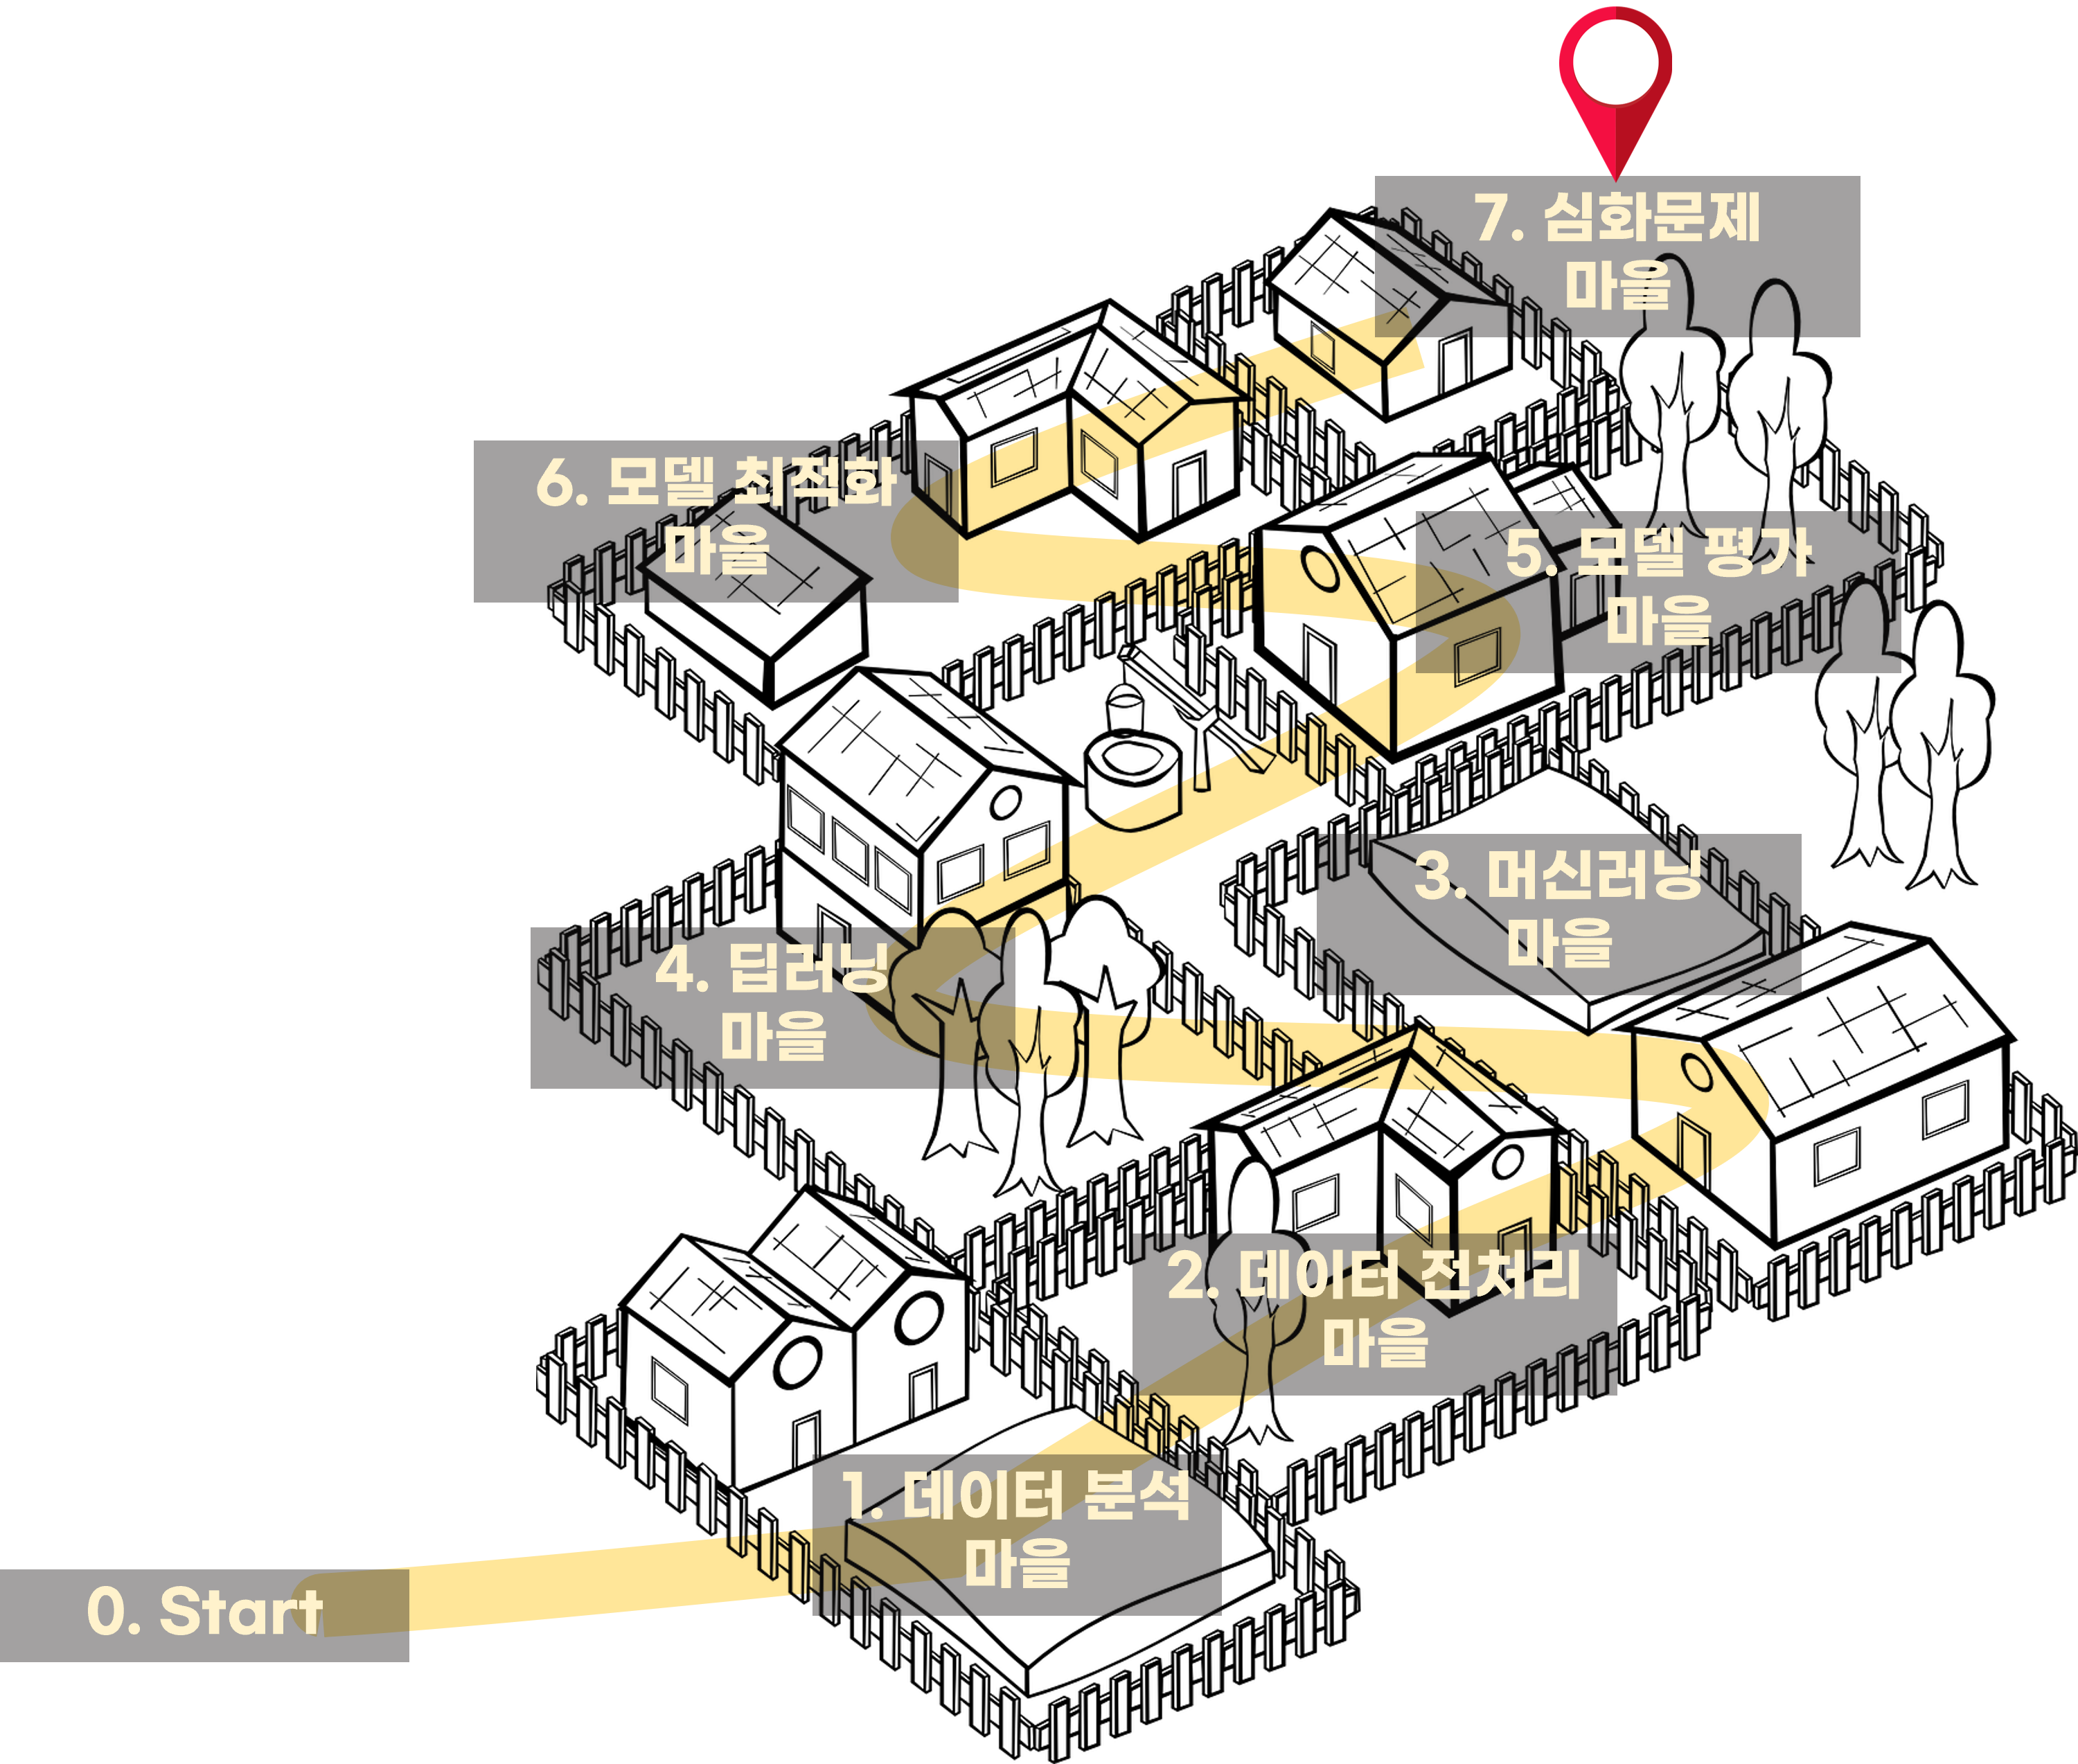

### [상황] 일곱 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost gspread oauth2client

     |████████████████████████████████| 292 kB 28.8 MB/s            
     |████████████████████████████████| 98 kB 3.3 MB/s              
     |████████████████████████████████| 96 kB 13.8 MB/s             


In [2]:
# ID를 입력해주세요.
# ID는 aivle 이메일의 아이디 d로 시작하는 7글자(예를 들어 d011001)
ID = "a021018"

---

# (실습준비) 데이터 불러오기부터

In [3]:
import pandas as pd

# 학습/평가 데이터 로딩
df = pd.read_csv('raw_data/onenavi_train.csv',sep="|")
df_eval = pd.read_csv('raw_data/onenavi_evaluation.csv',sep="|")

# 데이터 합치기
df_total = pd.concat([df,df_eval])

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

# 학습/평가 데이터 로딩
df_evaluation_target = pd.read_csv("add_data/onenavi_evaluation_et.csv",sep="|")
df_evaluation_feature = pd.read_csv("add_data/onenavi_evaluation_feature.csv",sep="|")

In [4]:
### Train/Test Data Split
from sklearn.model_selection import train_test_split

# train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

#### [실습문제1] 심화문제
* 랜덤포레스트를 활용해서 모델최적화를 하고 모델을 저장해주세요.
* 최적화된 모델은 6_model.pkl로 저장해주세요.
* 저장위치는 model 폴더입니다.
* 단서 : 비밀입니다. 모델만 저장하시면 자동으로 체크 예정이에요.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [20]:
# 아래에 실습코드를 작성하세요.
RF_model = RandomForestRegressor(n_estimators=100, random_state=42, )

params = {
    'n_estimators' : [130, 135, 140],
    'min_samples_split' : [38, 40, 42],
    'min_samples_leaf' : [4, 5, 6],
}

RF_model_GS = GridSearchCV(RF_model, param_grid=params, scoring='r2', cv=3, verbose=2)

RF_model_GS.fit(train_x, train_y)

RF_pred = RF_model_GS.predict(test_x)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=130; total time=  24.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=130; total time=  24.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=130; total time=  24.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=135; total time=  25.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=135; total time=  26.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=135; total time=  27.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=140; total time=  27.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=140; total time=  27.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=38, n_estimators=140; total time=  27.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=130; total time=  26.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=130; total time=  26.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=130; total time=  26.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=135; total time=  26.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=135; total time=  27.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=135; total time=  26.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=140; total time=  28.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=140; total time=  29.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=40, n_estimators=140; total time=  33.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=130; total time=  28.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=130; total time=  28.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=130; total time=  24.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=135; total time=  27.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=135; total time=  30.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=135; total time=  29.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=140; total time=  29.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=140; total time=  30.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=4, min_samples_split=42, n_estimators=140; total time=  30.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=130; total time=  28.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=130; total time=  27.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=130; total time=  27.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=135; total time=  28.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=135; total time=  28.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=135; total time=  27.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=140; total time=  28.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=140; total time=  27.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=38, n_estimators=140; total time=  26.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=130; total time=  23.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=130; total time=  24.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=130; total time=  24.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=135; total time=  25.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=135; total time=  25.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=135; total time=  25.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=140; total time=  26.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=140; total time=  25.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=40, n_estimators=140; total time=  25.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=130; total time=  22.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=130; total time=  22.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=130; total time=  21.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=135; total time=  22.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=135; total time=  22.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=135; total time=  22.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=140; total time=  22.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=140; total time=  23.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=5, min_samples_split=42, n_estimators=140; total time=  23.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=130; total time=  20.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=130; total time=  21.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=130; total time=  21.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=135; total time=  22.3s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=135; total time=  23.2s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=135; total time=  23.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=140; total time=  23.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=140; total time=  23.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=38, n_estimators=140; total time=  23.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=130; total time=  20.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=130; total time=  21.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=130; total time=  21.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=135; total time=  21.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=135; total time=  22.6s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=135; total time=  23.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=140; total time=  23.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=140; total time=  24.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=40, n_estimators=140; total time=  23.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=130; total time=  21.8s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=130; total time=  22.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=130; total time=  22.4s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=135; total time=  22.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=135; total time=  23.0s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=135; total time=  22.9s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=140; total time=  22.5s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=140; total time=  23.7s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END min_samples_leaf=6, min_samples_split=42, n_estimators=140; total time=  24.1s


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [21]:
RF_model_GS.best_params_

{'min_samples_leaf': 6, 'min_samples_split': 40, 'n_estimators': 140}

In [22]:
RF_model_GS.best_score_

0.7251380659260516

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
print("RMSE : ", round(mean_squared_error(test_y, RF_pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, RF_pred), 5))

RMSE :  279.98216
r2 score :  0.70957


In [25]:
import pickle
import joblib

In [26]:
joblib.dump(RF_model_GS, './model/6_model.pkl')

['./model/6_model.pkl']

In [ ]:
# 단서1은 따로 적지 않으셔도 됩니다. '6_model.pkl'로 저장만 하시면 자동으로 체크합니다.

#### [실습문제2] 심화문제
* Tensorflow를 활용해서 모델최적화를 하고 모델을 저장해주세요.
* 최적화된 모델은 DeeplearningModel_2.h5로 저장해주세요.
* 저장위치는 model 폴더입니다.
* 단서 : 비밀입니다. 모델만 저장하시면 자동으로 체크 예정이에요.

In [6]:
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# 아래에 실습코드를 작성하세요.
keras.backend.clear_session()

model = keras.Sequential(
    [
        layers.Input(shape=(108,)),
        layers.Dense(4096, activation="relu"),
        layers.Dense(1, activation="linear")
    ]
)

model.compile(loss=keras.losses.MeanSquaredError(),
             optimizer=keras.optimizers.Adam(),
             metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              446464    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4097      
Total params: 450,561
Trainable params: 450,561
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [14]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [15]:
model.fit(train_x,
          train_y,
          epochs=100,
          verbose=1,
          callbacks=[es],
          validation_data=(test_x, test_y))

pred = model.predict(test_x)

Epoch 1/100
1386/1386 [==============================] - 8s 5ms/step - loss: 456448.8625 - mae: 483.0760 - mse: 456448.8625 - val_loss: 100339.6562 - val_mae: 212.3606 - val_mse: 100339.6562
Epoch 2/100
1386/1386 [==============================] - 7s 5ms/step - loss: 90743.4109 - mae: 204.6366 - mse: 90743.4109 - val_loss: 87154.6797 - val_mae: 190.6315 - val_mse: 87154.6797
Epoch 3/100
1386/1386 [==============================] - 7s 5ms/step - loss: 84595.2305 - mae: 188.6776 - mse: 84595.2305 - val_loss: 80095.3125 - val_mae: 181.9736 - val_mse: 80095.3125
Epoch 4/100
1386/1386 [==============================] - 7s 5ms/step - loss: 71184.0487 - mae: 177.1878 - mse: 71184.0487 - val_loss: 77743.3203 - val_mae: 180.7327 - val_mse: 77743.3203
Epoch 5/100
1386/1386 [==============================] - 7s 5ms/step - loss: 71756.9962 - mae: 175.8672 - mse: 71756.9962 - val_loss: 76901.4219 - val_mae: 178.8010 - val_mse: 76901.4219
Epoch 6/100
1386/1386 [==============================] - 8s 5

In [36]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  276.35283
r2 score :  0.71705


In [41]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  274.54647
r2 score :  0.72074


In [46]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  273.91451
r2 score :  0.72202


In [51]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  273.6178
r2 score :  0.72263


In [56]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  273.19557
r2 score :  0.72348


In [12]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  273.0219
r2 score :  0.72383


In [17]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  272.87193
r2 score :  0.72414


In [ ]:
```````````````````````````````````````````````````````````````````````````````

In [11]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  276.24642
r2 score :  0.71727


In [16]:
print("RMSE : ", round(mean_squared_error(test_y, pred, squared=False), 5))
print("r2 score : ", round(r2_score(test_y, pred), 5))

RMSE :  272.78474
r2 score :  0.72431


In [17]:
model.save('./model/DeeplearningModel_2.h5')

In [ ]:
et = np.array(test_y['ET'])

In [ ]:
# 단서2는 따로 적지 않으셔도 됩니다. 'DeeplearningModel_2.h5'로 저장만 하시면 자동으로 체크합니다.

---

In [26]:
# 필요한 라이브러리 import
import tensorflow as tf
import joblib
import tensorflow
from tensorflow import keras

# 모델을 담을 빈 리스트 생성
model_result = []

In [28]:
model_result.append(joblib.load('./model/4_model.pkl'))
model_result.append(joblib.load('./model/5_model.pkl'))
model_result.append(joblib.load('./model/6_model.pkl'))
model_result.append(keras.models.load_model('./model/DeeplearningModel_2.h5'))

In [29]:
def calculation_etaa(et, eta):
    etaa = (1-(abs(et-eta)/et))*100.0
    etaa[(etaa < 0)] = 0
    return etaa

In [31]:
# 아래에 실습코드를 실행시키세요.
e1_list = ['ETA1', 'ETA2', 'ETA3', 'ETA4']
e2_list = ['ETAA1', 'ETAA2', 'ETAA3', 'ETAA4']

for e1, e2, model in zip(e1_list, e2_list, model_result):
    df_evaluation_target[e1] = model.predict(df_evaluation_feature)
    etaa_value = calculation_etaa(df_evaluation_target['ET'], df_evaluation_target[e1])
    df_evaluation_target[e2] = etaa_value

# mean, min, max, std
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']
alg = ['DATA', 'XBR', 'ML-GBR','ML-RFR',  'Deep']

print('+-------------------------------------------------------+')
print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
print('+----------+---------+-----------+----------+-----------+')
for i, e in zip(range(len(alg)), etaa):
    eMean = df_evaluation_target[e].mean()
    eStd = df_evaluation_target[e].std()
    eMin = df_evaluation_target[e].min()
    eMax = df_evaluation_target[e].max()
    print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  | '.format(alg[i], eMean, eStd, eMin, eMax))
print('+----------+---------+-----------+----------+-----------+\n\n')

+-------------------------------------------------------+
|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |
+----------+---------+-----------+----------+-----------+
|  DATA    |   81.4  |   015.7   |    0.0   |    100.0  | 
|  XBR     |   82.6  |   016.9   |    0.0   |    100.0  | 
|  ML-GBR  |   82.6  |   017.0   |    0.0   |    100.0  | 
|  ML-RFR  |   81.8  |   017.5   |    0.0   |    100.0  | 
|  Deep    |   82.0  |   017.2   |    0.0   |    100.0  | 
+----------+---------+-----------+----------+-----------+




### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 획득했습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [19]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.seventhModule(ID)

단서1 정답
단서2 정답
드래곤볼을 획득했습니다.


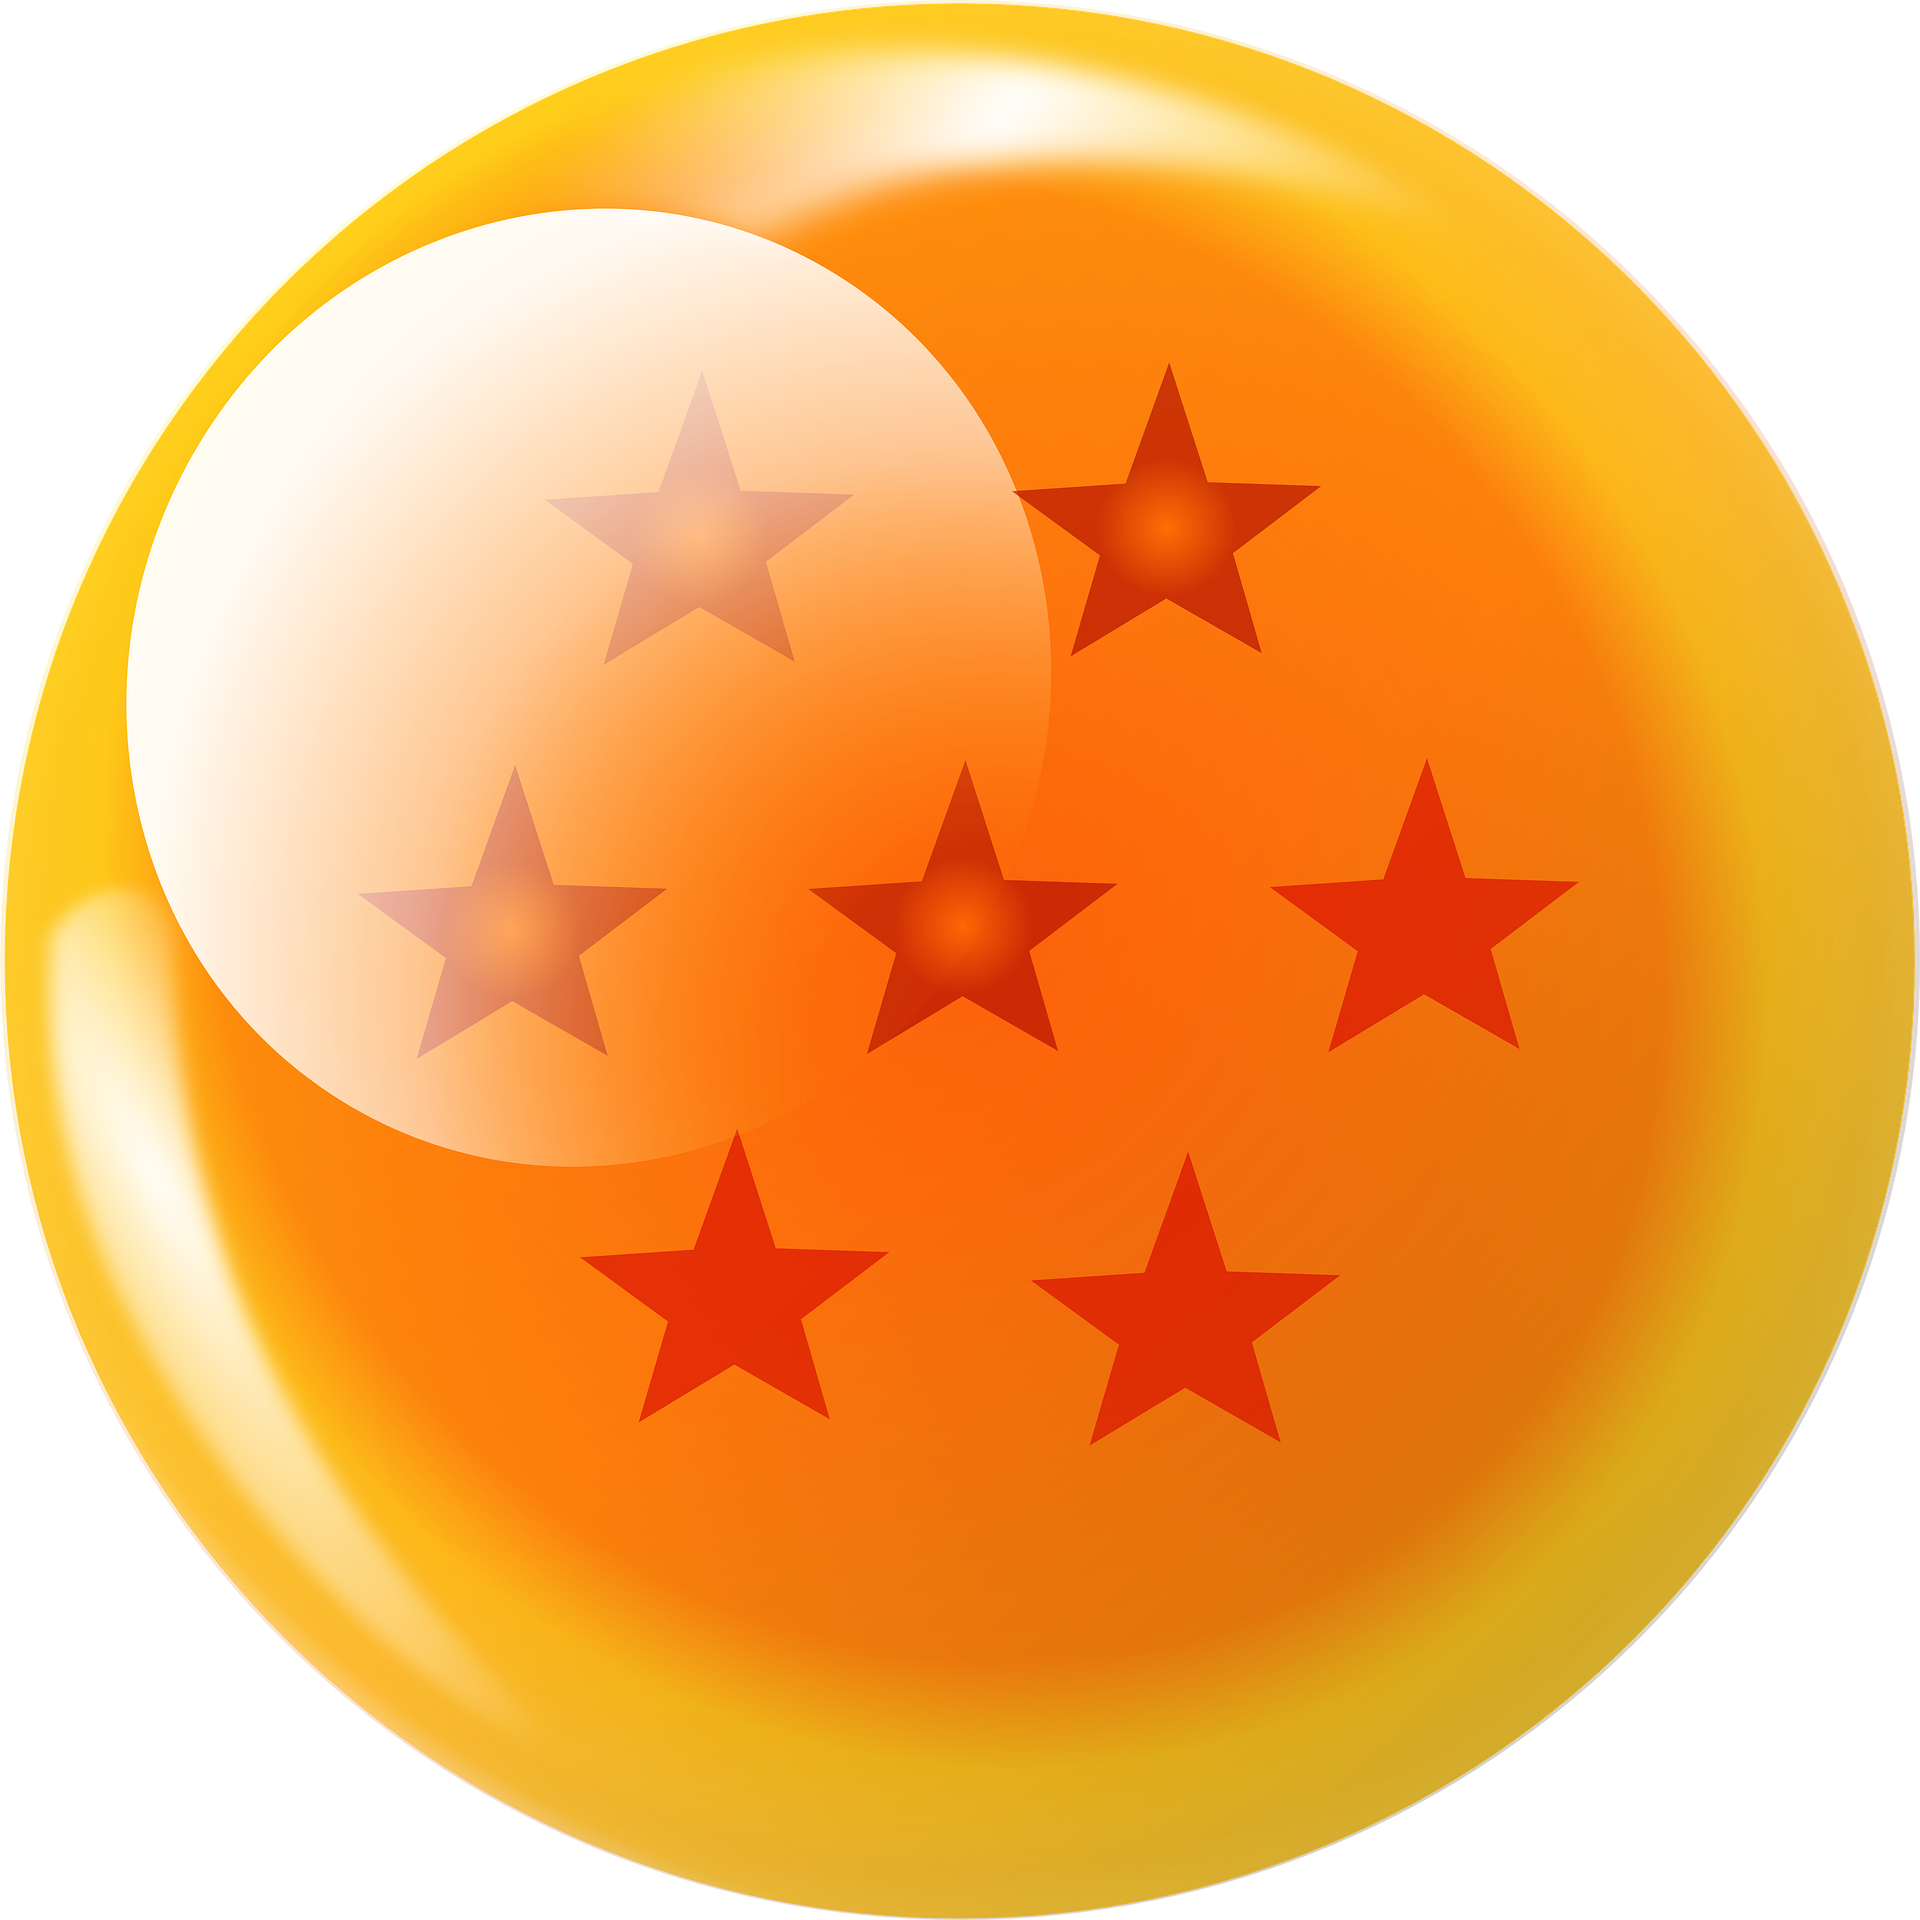

In [20]:
# 확인
from IPython.display import Image
Image("./dragonball/7성구.png", width=300, height=300)